# compute D given MSD
Tim Tyree<br>
1.17.2021

In [2]:
from lib.my_initialization import *
from lib import *
from lib.utils.utils_traj import *
import trackpy
from scipy import stats
%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


In [3]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# compute diffusion coefficients for one file of csv results for fixed tau_min/max

In [61]:
# def compute_diffusion_coeffs(input_file_name,tau_min=.15,tau_max=0.5):
#     #select ranges that look linear
#     tau_min=.15#0
#     tau_max=0.5#$1.#0.2#seconds

#     #load csv msd data
#     df=pd.read_csv(input_file_name)

#     #initialize output dataframe
#     ef=df.groupby('src').src.count()
#     sv=ef.index;nv=ef.values
#     df2=pd.DataFrame({'src':sv,'N':nv})

#     # select msd data for single trial
#     src_lst=list(set(df.src.values))

#     for src in src_lst:
#         # src=src_lst[0]
#         tau_values,msd_values=df[df.src==src][['lagt','msd']].values.T

#         boo=(tau_values>=tau_min)&(tau_values<=tau_max)
#         x_values=tau_values[boo]
#         y_values=msd_values[boo]
#         duration_of_traj=tau_values[-1]

#         if x_values.shape[0]>0:
#             #compute diffusion coefficient
#             slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
#             #    std_err: D_stderr : Standard error of the estimated gradient.
#             #    slope  : D_expval : diffcoef of msd curve
#             D_expval=slope
#             D_stderr=std_err
#             #     retval=src,duration_of_traj,D_expval,D_stderr,intercept,r_value,p_value
#         else:
#             #no value was found
#             D_expval=-9999.;D_stderr=-9999.;intercept=-9999.;r_value=-9999.;p_value=-9999.

#         #update output dataframe with diffusion coefficient measurements
#         df2.loc[df2.src==src,'D_expval']=D_expval#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'D_stderr']=D_stderr#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'duration_of_traj']=duration_of_traj#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'intercept']=intercept#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'Rsquared']=r_value**2#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'p_value']=p_value#df2.loc[df2.src==src,


#     #save results to csv
#     os.chdir(os.path.dirname(input_file_name))
#     savefn=("diffcoeff_"+os.path.basename(input_file_name)).replace('.csv',f'_Tmin_{tau_min}_Tmax_{tau_max}.csv')
#     df2.to_csv(savefn)
#     return savefn

In [58]:
input_file_name=search_for_file("/home/timothytyree/Documents/GitHub/care/notebooks/Data")
input_file_name

()

In [57]:
retval= compute_diffusion_coeffs_for_msd(input_file_name,tau_min=.15,tau_max=0.5)
retval

'diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv'

In [62]:
retval

'diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv'

In [63]:
#compute MSD (mean squared displacements), aggregating results
n_tips=1; DT=1.
retval=gen_msd_figs(input_file_name,n_tips, DT)

AttributeError: 'tuple' object has no attribute 'find'

## visualize for one trial msd versus lag time

In [155]:
#load csv msd data
df=pd.read_csv(input_file_name)
df.head()

,msd,lagt,src
0,0.000155,0.001,ic_200x200.001.11_traj_sr_400_mem_2.csv
1,0.000598,0.002,ic_200x200.001.11_traj_sr_400_mem_2.csv
2,0.001306,0.003,ic_200x200.001.11_traj_sr_400_mem_2.csv
3,0.002258,0.004,ic_200x200.001.11_traj_sr_400_mem_2.csv
4,0.003435,0.005,ic_200x200.001.11_traj_sr_400_mem_2.csv


In [156]:
# select msd data for single trial
src_lst=list(set(df.src.values))
src=src_lst[0]
t_values,msd_values=df[df.src==src][['lagt','msd']].values.T

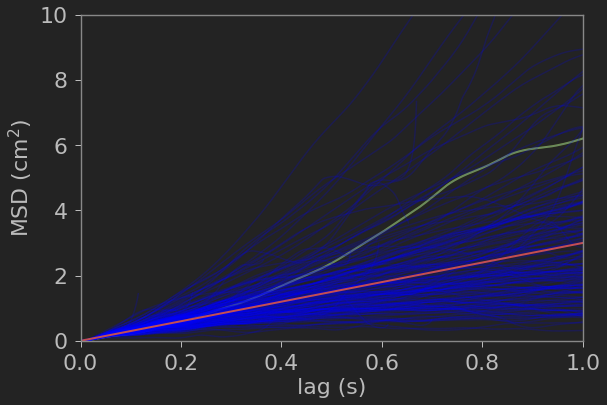

In [159]:
# plot msd for each trial versus lag
saving = False
V_thresh=0.4
savefig_fn = os.path.basename(input_file_name).replace('.csv','_short_time.svg')
savefig_folder = os.path.join(nb_dir,f'Figures/msd/V_{V_thresh}')
fontsize =22
figsize=(9,6)

fig, ax = plt.subplots(figsize=figsize)
# x_values = ef.index.values#*DT/10**3 #lag in seconds
# y_values = ef.values#*DS**2 #msd
ax.plot(t_values,msd_values,c='g',lw=2)

for src in src_lst:
    x_values = df[df.src==src].lagt.values
    y_values = df[df.src==src].msd.values
    ax.plot(x_values,y_values,c='blue',alpha=0.2)
# DS = 5/200 #cm per pixel
# DT = 1. #ms per frame
# D = 1/0.013# param set 8 ds 5
D=0.6/0.2
ax.plot(t_values,t_values*D,c='r',lw=2)


ax.set_xlim([0,1.])#.2])
ax.set_ylim([0,10])#1])
ax.set_xlabel('lag (s)', fontsize=fontsize)
ax.set_ylabel(r'MSD (cm$^2$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")

_Schema_:
- src
    - duration_of_traj
    - D_expval
    - D_stderr
    - intercept
    - r_value
    - p_value

In [116]:
# _Schema_:
{src:{
    "duration_of_traj":duration_of_traj,
    "D_expval":D_expval,
    "D_stderr":D_stderr,
    "intercept":intercept,
    "Rsquared":r_value**2,
    "p_value":p_value
}}

{'ic_200x200.019.22_traj_sr_400_mem_2.csv': {'duration_of_traj': 3.695,
  'D_expval': 4.704938247930185,
  'D_stderr': 0.02563458304621069,
  'intercept': 0.18092123838629748,
  'Rsquared': 0.975444814627612,
  'p_value': 0.0}}

It appears that changing the param set changed the diffcoef of spiral tips.  I would expect changing the domain size does not change the diffcoef of spiral tips.

In [ ]:
def compute_diffcoef(t_values,msd_values):pass
assert(t_values.shape==msd_values.shape)

# visualize diffusion coefficients for all trials in a data run

In [283]:
folder_name="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/msd"
os.chdir(folder_name)
df_dir='diffcoeff_emsd_longest_by_trial_tips_ntips_1.csv'
# df_dir=savefn

df=pd.read_csv(df_dir,index_col=0)

In [284]:
#filter results by whether a D_expval was found
print(f"""num. trials that didn't show a tip lasing longer than 150ms
is {df[df.D_expval<-1000].N.size}.""")
df=df[df.D_expval>=-1000].copy()

num. trials that didn't show a tip lasing longer than 150ms
is 2.


In [285]:
#filter results by whether a D_expval was found
R2_thresh=0.94
print(f"""num. trials that didn't show am Rsquared of at least {R2_thresh} is {df[df.D_expval<R2_thresh].N.size}.""")
df=df[df.Rsquared>=R2_thresh].copy()

num. trials that didn't show am Rsquared of at least 0.94 is 13.


In [286]:
#plot results
x_values= df.duration_of_traj.values
y_values= df.D_expval.values
yerr_values= df.D_stderr.values

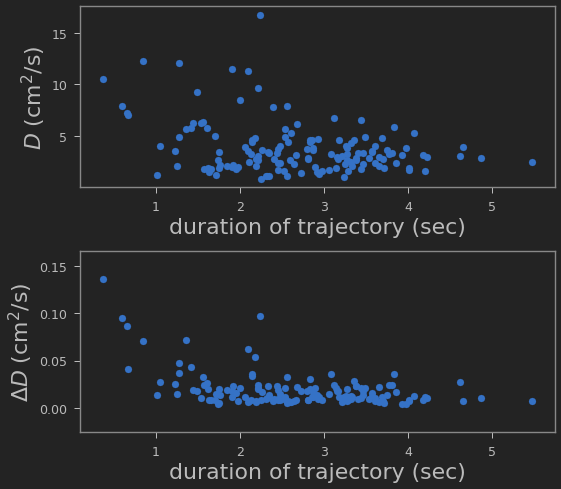

In [287]:
fontsize=22
fig,axs=plt.subplots(2)
ax=axs[0]
ax.scatter(x_values,y_values)
ax.set_xlabel('duration of trajectory (sec)',fontsize=fontsize)
ax.set_ylabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)

ax=axs[1]
ax.scatter(x_values,yerr_values)
ax.set_xlabel('duration of trajectory (sec)',fontsize=fontsize)
ax.set_ylabel(r'$\Delta D$ (cm$^2$/s)',fontsize=fontsize)

plt.tight_layout()
plt.show()



In [302]:
duration_thresh=2.5#seconds

print(f"it appears that the stderr of D is large for tips lasting less than 2.5 seconds")
#filter trajectories shorter than 2.5 seconds in duration
print(f"""filtering {} trajectories shorter than {duration_thresh:.1f} seconds in duration""")
df=df[df.duration_of_traj>=duration_thresh].copy()

it appears that the stderr of D is large for tips lasting less than 2.5 seconds
filter trajectories shorter than 2.5 seconds in duration


In [303]:
#TODO: plot histogram of these diffusion coefficients against their uncertainties
x_values= df.duration_of_traj.values
y_values= df.D_expval.values
yerr_values= df.D_stderr.values

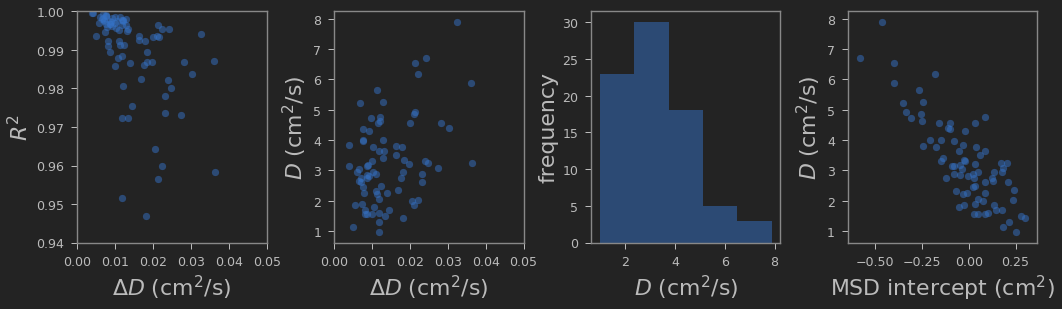

In [304]:
fontsize=22
figsize=(15,4.5)
fig,axs=plt.subplots(ncols=4,figsize=figsize)

ax=axs[0]
ax.scatter(yerr_values,df.Rsquared.values, alpha=0.5)
ax.set_xlabel(r'$\Delta D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_ylabel(r'$R^2$',fontsize=fontsize)
ax.set_ylim([R2_thresh,1])
ax.set_xlim([0,0.05])

ax=axs[1]
ax.scatter(yerr_values,y_values, alpha=0.5)
ax.set_xlabel(r'$\Delta D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_ylabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_xlim([0,0.05])

ax=axs[2]
ax.hist(y_values,bins=5, alpha=0.5)
ax.set_ylabel(r'frequency',fontsize=fontsize)
ax.set_xlabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)

ax=axs[3]
ax.scatter(df.intercept.values,y_values, alpha=0.5)
ax.set_xlabel(r'MSD intercept (cm$^2$)',fontsize=fontsize)
ax.set_ylabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)

plt.tight_layout()
plt.show()

In [28]:
num_trials_considered=df.N.values.shape[0]
print(f"number of trials considered = {num_trials_considered}.")
c=df.describe().T[['mean','std']].T

NameError: name 'df' is not defined

In [27]:
# input_file_name='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/msd/emsd_longest_by_trial_tips_ntips_1.csv'
sl=input_file_name.split('/')
trial_name=sl[-3]
n_tips=eval(sl[-1][sl[-1].find('ntips_')+len('ntips_'):].split('.')[0])
mean_D, stdev_D=c[['D_expval']].values
mean_D=float(mean_D);stdev_D=float(stdev_D)
mean_stderr_D=float(c[['D_stderr']].values[0])
stdev_stderr_D=float(c[['D_stderr']].values[1])
num_trials_considered=df.N.values.shape[0]

df_out=pd.DataFrame({'trial_folder_name':[trial_name], 'n_tips':[n_tips],
                     "mean_D":[mean_D], "stdev_D":[stdev_D], 
                     "mean_stderr_D":[mean_stderr_D], "stdev_stderr_D":[stdev_stderr_D],
                    "num_trials_considered":[num_trials_considered],
                    "num_trials_computed":[171], 
                     "tau_min":[tau_min],"tau_max":[tau_max],
                     "R2_thresh":[R2_thresh], "duration_thresh":[duration_thresh]})

NameError: name 'c' is not defined

In [ ]:
# diffcoeff_fn_base="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/msd/diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv"
# foo_dfn=lambda trial_folder_name:diffcoeff_fn_base.replace('ds_5_param_set_4',trial_folder_name)


# trial_folder_name_lst=[
#     'ds_5_param_set_8_fastkernel_V_0.5_archive',
#     'ds_5_param_set_4'
# ]

In [344]:
#TODO: save output
df_out


#TODO: repeat all ^this for different simulation conditions completed

,trial_folder_name,n_tips,mean_D,stdev_D,mean_stderr_D,stdev_stderr_D,num_trials_considered,num_trials_computed,tau_min,tau_max,R2_thresh,duration_thresh
0,ds_5_param_set_8_fastkernel_V_0.4_archive,1,3.275622,1.407308,0.014265,0.007477,79,171,0.15,0.5,0.94,2.5


In [345]:
# other things to quantify...
#TODO: compute the interaction/creation/destruction ranges
#TODO: measure speed as a function of time when two tips pair-create 
#TODO: measure speed as a function of time when two tips pair-annihilate

#TODO: get the longest lasting unwrapped tip trajectory for a given src
#TODO(later): develop method of detecting pauses in an unwrapped trajectory 
#TODO: compute the mean time between pauses
#TODO: compute the mean duration of pauses

#DONT(stupid): visualize spiral tip speed (realtime) versus D (lagtime)


In [67]:
# #DONE: check on pipeline output

# diffcoeff_fn_base="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/msd/diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv"
# input_file_name=diffcoeff_fn_base

# #TODO: save df_out in initial-conditions-2/
# sl=input_file_name.split('/')
# trial_folder_name=sl[-4]
# save_folder_table = os.path.join(nb_dir,f'Figures/msd/'+trial_folder_name)
# file_out=save_folder_table+'/avg-diffcoeff-table.csv'
# # os.path.dirname(input_file_name)

'/home/timothytyree/Documents/GitHub/care/notebooks/Figures/msd/initial-conditions-suite-2'

In [3]:
#TODO: save ^those images
#TODO: check ^those images saved correctly

#TODO: check on LR simulation
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

In [6]:
#compute mean squared displacements, aggregating results
n_tips=1; DT=1.
# file_out=output_file_name_list[0]
file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_1_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)

Num. file names in list = 171.
ValueError: No objects to concatenate
	trial that failed: ic_200x200.008.12_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.011.31_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.018.31_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.011.33_traj_sr_400_mem_0_unwrap.csv
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_long_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_short_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_very_short_time_std.png


In [12]:
beep(3)
!pwd

/home/timothytyree/Documents/GitHub/care/notebooks/Figures/msd/ds_1_param_set_8


# TODO(later): compute interaction ranges

In [8]:
#let's view on eof those trajectories that failed to concat
#frame numbering appears to be wrong
file_sus='ic_200x200.008.12_traj_sr_400_mem_0_unwrap.csv'
df_traj=get_longest_trajectories(file_out,n_tips = 1,DS = 5/200,DT = 1., round_t_to_n_digits=0)


In [24]:
from lib.routines.compute_interactions import *
# TODO: crop trajectories before deciding which is longest
folder='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_og/trajectories'
os.chdir(folder)
file_sus='ic_200x200.008.12_traj_sr_400_mem_0.csv'
compute_df_interactions(file_sus,DS=5./200.)

,pid,pid_birthmate,pid_deathmate,r0,rT,Tavg,Tdiff


# (ignore, moved earlier): compute msd for given trial_folder

In [14]:
file_in=search_for_file()
trgt='_unwrap.csv'
assert(file[-len(trgt):]==trgt)
file

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.001.11_traj_sr_400_mem_0_unwrap.csv


In [40]:
#compute mean squared displacements, aggregating results
n_tips=1; DT=1.
# output_file_name_list[0]
file_in=input_file_name
# file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_1_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
retval=gen_msd_figs(file_in,n_tips, DT)#, V_thresh=0.4)

Num. file names in list = 171.
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_long_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_short_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_very_short_time_std.png


# generate diffusion coefficient table

In [3]:
from lib.routines.dag_log_to_msd import *

In [96]:
os.path.dirname(nb_dir)

'/home/timothytyree/Documents/GitHub/care'

In [97]:
input_folder=f"{nb_dir}/Data/initial-conditions-suite-2"
retval= gen_diffcoeff_table(input_folder)
beep(7)

TypeError: generate_diffcoeff_figures() missing 1 required positional argument: 'dir_out'

In [82]:
#TODO: debug gen_diffcoeff_table.  it is saving empty rows.
df=pd.read_csv('/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/avg-diffcoeff-table.csv')
df

,Unnamed: 0,trial_folder_name,n_tips,mean_D,stdev_D,mean_stderr_D,stdev_stderr_D,num_trials_considered,num_trials_computed,tau_min,tau_max,R2_thresh,duration_thresh
0,0,ds_5_param_set_8_fastkernel_V_0.4_archive,1,3.275622,1.407308,0.014265,0.007477,79,171,0.15,0.5,0.94,2.5
1,0,ds_5_param_set_8_fastkernel_V_0.5_archive,1,3.143848,1.394320,0.014002,0.007125,67,171,0.15,0.5,0.94,2.5
2,0,ds_5_param_set_8_fastkernel_V_0.6_archive,1,2.978615,0.971810,0.015702,0.006242,51,171,0.15,0.5,0.94,2.5
3,0,ds_5_param_set_8_og,1,5.059754,1.818385,0.022178,0.008431,22,171,0.15,0.5,0.94,2.5
4,0,ds_5_param_set_4,1,NaN,NaN,NaN,NaN,0,171,0.15,0.5,0.94,2.5
5,0,ds_2_param_set_8,1,NaN,NaN,NaN,NaN,0,171,0.15,0.5,0.94,2.5
6,0,ds_1_param_set_8,1,NaN,NaN,NaN,NaN,0,171,0.15,0.5,0.94,2.5


In [84]:
gen_diffcoeff_table

<function lib.routines.dag_log_to_msd.gen_diffcoeff_table(input_folder, **kwargs)>

### TODO: debug gen_diffcoeff_table.  it is saving empty rows.
- ds_1_param_set_8 is printed in every row
- nan mean_D recorded in every row

In [3]:
# TODO: get all folders in the cwd containing the pattern 'ds_'
fn=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/msd/emsd_longest_by_trial_tips_ntips_1.csv


In [5]:
input_file_name=fn
df=pd.read_csv(input_file_name)
df.head()

,msd,lagt,src
0,0.003831,0.001,ic016.22_traj_sr_400_mem_0_unwrap.csv
1,0.014119,0.002,ic016.22_traj_sr_400_mem_0_unwrap.csv
2,0.029202,0.003,ic016.22_traj_sr_400_mem_0_unwrap.csv
3,0.047560,0.004,ic016.22_traj_sr_400_mem_0_unwrap.csv
4,0.067110,0.005,ic016.22_traj_sr_400_mem_0_unwrap.csv


In [11]:

trial_folder_name

'ds_5_param_qu_tmax_30_Ko_5.4'

In [19]:
#TODO: generate fn='emsd_...' functionally using a dask bag
#TODO: test runtime of ^that naively
#TODO(later): determine which jobs need given to a dask bag ahead of time?
from lib.routines.compute_diffcoef import *
input_file_name=fn#f"{nb_dir}/Data/"
fn2= compute_diffusion_coeffs(input_file_name,tau_min=.15,tau_max=0.5)
sl=input_file_name.split('/')
trial_folder_name=sl[-3]
input_file_name=os.path.abspath(fn2)
retval= generate_diffcoeff_figures(input_file_name,trial_folder_name,tau_min=.15,tau_max=0.5,saving=True,
        R2_thresh=0.4,duration_thresh=0.,fontsize=22,figsize_2=(15,4.5))


generating diffcoeff_figures for ds_5_param_qu_tmax_30_Ko_5.4
	num. trials that didn't show a tip lasing longer than 150ms is 0, and that didn't show am Rsquared of at least 0.4 is 12
saved diffcoeff_summary to 
the total number of trials considered in summary is 29


In [20]:
df=pd.read_csv(retval)

In [21]:
df.head()

,Unnamed: 0,trial_folder_name,n_tips,mean_D,stdev_D,mean_stderr_D,stdev_stderr_D,num_trials_considered,num_trials_computed,tau_min,tau_max,R2_thresh,duration_thresh
0,0,ds_5_param_qu_tmax_30_Ko_5.4,1,59.925997,186.34651,5.849502,7.509228,29,155,0.15,0.5,0.4,0.0


In [83]:
#MSD intercept is stable and normal for all but a couple funny trials that I'm guessing I'm already filtering.
# plt.subplots(figsize=(3.5,3))
# plt.hist(df[df.intercept>-1].intercept.values,bins=10)
# plt.xlabel(r'MSD intercept (cm$^2$/s)')
# plt.ylabel('frequency')
# plt.show()

In [57]:
here_dir=os.path.dirname(os.path.abspath(input_file_name))
savefig_folder = os.path.join(here_dir,'fig')#f'Figures/msd/'+trial_folder_name)
# if not os.path.exists(savefig_folder):
savefig_folder

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/msd/fig/fig'

# step through routine being used to make diffusion coefficient figures, and make it always give real output
- default method of detecting spiral tips is not effective here
- TODO: plot MSD
- TODO: determine which trials look diffusive
- TODO: estimate the avg(+-std) diffcoeff for that trial. record

In [22]:
#import emsd_fn
fn=search_for_file()#os.path.dirname(fn))

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/msd/emsd_longest_by_trial_tips_ntips_1.csv


In [23]:
df=pd.read_csv(fn,index_col=False)
df.head()

,msd,lagt,src
0,0.003831,0.001,ic016.22_traj_sr_400_mem_0_unwrap.csv
1,0.014119,0.002,ic016.22_traj_sr_400_mem_0_unwrap.csv
2,0.029202,0.003,ic016.22_traj_sr_400_mem_0_unwrap.csv
3,0.047560,0.004,ic016.22_traj_sr_400_mem_0_unwrap.csv
4,0.067110,0.005,ic016.22_traj_sr_400_mem_0_unwrap.csv


In [117]:
t_values, msd_values, std_values = compute_average_std_msd(df,DT)
#     t_values, msd_values = compute_average_msd(df, DT=1.)

sl=input_file_name.split('/')
trial_folder_name=sl[-3]

os.chdir(save_folder)
savefig_folder='fig'
# if not os.path.exists(savefig_folder):
#     os.mkdir(savefig_folder)
# os.chdir(savefig_folder)
savefig_folder=os.getcwd()
# generate plots of msd's
savefig_fn = os.path.basename(output_file_name).replace('.csv','_myview.png')

retval = PlotMSD(df, t_values, msd_values, std_values, savefig_folder,savefig_fn,xlim = [0,0.2],ylim=[0,1],saving = False,fontsize =22,figsize=(9,6),D=3.5)


NameError: name 'DT' is not defined

In [112]:
# D_values=df[(df.D_expval>-100)&(df.D_expval<100)].D_expval.values

In [11]:
retval=gen_msd_figs(fn,n_tips=1,DT=2.)

Num. file names in list = 159.
ValueError: No objects to concatenate
	trial that failed: ic005.33_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic008.21_traj_sr_400_mem_0_unwrap.csv


ValueError: Invalid file path or buffer object type: <class 'float'>

In [10]:
retval = PlotMSD(df, t_values, msd_values, std_values, savefig_folder,savefig_fn,xlim = [0,0.2],ylim=[0,1],saving = True,fontsize =22,figsize=(9,6),D=3.5)


'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/trajectories_unwrap/ic001.21_traj_sr_400_mem_0_unwrap.csv'

# do there exist tips in the 900x900 (still wrapped)LR trajectories that last for more than 300ms?
- if so, what about in the unwrapped trajectories

In [16]:
file=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-300x300/param_qu_tmax_30/Log/ic300x300.0.0_traj_sr_600_mem_0_unwrap.csv


In [17]:
trgt='_unwrap.csv'
input_fn_lst=get_all_files_matching_pattern(file,trgt)
len(input_fn_lst)

144

In [18]:
fn=input_fn_lst[0]
df=pd.read_csv(fn)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.1,14,0.000000,0.000000,-12.929629,2.092927,0.554988,1.034923,0,0
1,102.1,14,0.206456,0.090404,-1.658291,1.216451,1.165742,0.986391,1,0
2,104.1,16,0.874516,0.911988,-1.025610,1.169340,1.165411,0.986151,2,0
3,106.1,14,2.259772,1.904244,-0.922982,1.180725,1.305036,0.972071,3,0
4,108.1,14,3.177685,2.306984,-0.515321,1.149242,3.507548,0.758648,4,0


In [19]:
#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT

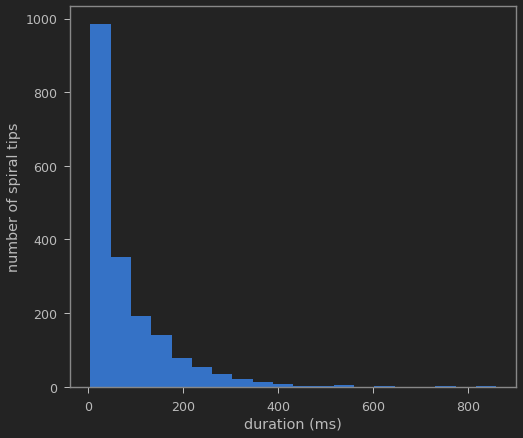

860


In [20]:
plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

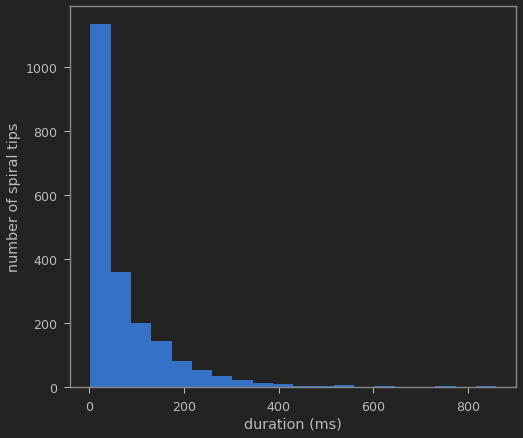

860


In [21]:
#view the corresponding histogram for the wrapped trajectories
# trgt='_unwrap.csv'
# input_fn_lst=get_all_files_matching_pattern(file,trgt)
# len(input_fn_lst)

# fn=input_fn_lst[0]
fn2=fn.replace('_unwrap','')
df=pd.read_csv(fn2)
df.head()

#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT

plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

In [13]:
#thus, the problem isn't from the unwrapping...
#TODO: visualize the spiral tips in a .gif for the LR model. 
#TODO: verify whether ^these spiral tips are reasonable
#TODO(failing ^that): consider coloring by spiral tip index using attentional algorithm
#TODO: verify whether ^these spiral tip trajectories are reasonable
#TODO(finally): implement attentional spiral tip detection algorithm in python (maybe later, C++, and then CUDA)


__Results__ _R makes tips too brief to give nice MSD traces_
- the 600x600 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...
- the 300x300 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...

thus, either something is wrong with tip tracking or these tips from the standard LR are not lasting long enough to get a nice MSD curve that D can be extracted from.

In [15]:
# # do there exist tips in the 900x900 (still wrapped)LR trajectories that last for more than 300ms?
# # - if so, what about in the unwrapped trajectories

# file=search_for_file()

# trgt='_unwrap.csv'
# input_fn_lst=get_all_files_matching_pattern(file,trgt)
# len(input_fn_lst)

# fn=input_fn_lst[0]
# df=pd.read_csv(fn)
# df.head()

#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT

plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

#view the corresponding histogram for the wrapped trajectories
# trgt='_unwrap.csv'
# input_fn_lst=get_all_files_matching_pattern(file,trgt)
# len(input_fn_lst)

# fn=input_fn_lst[0]
fn2=fn.replace('_unwrap','')
df=pd.read_csv(fn2)
df.head()

#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT
plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

#thus, the problem isn't from the unwrapping...
#TODO: visualize the spiral tips in a .gif for the LR model. 
#TODO: verify whether ^these spiral tips are reasonable
#TODO(failing ^that): consider coloring by spiral tip index using attentional algorithm
#TODO: verify whether ^these spiral tip trajectories are reasonable
#TODO(finally): implement attentional spiral tip detection algorithm in python (maybe later, C++, and then CUDA)


__Results__ _R makes tips too brief to give nice MSD traces_
- the 600x600 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...
- the 300x300 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...

thus, either something is wrong with tip tracking or these tips from the standard LR are not lasting long enough to get a nice MSD curve that D can be extracted from.



SyntaxError: invalid syntax (<ipython-input-15-690c38f94351>, line 54)

# TODO: measure quasiperiodic diffusion coefficients using thresholded tau_min/max
TODO: measure ~6 manually for FK param_set_4 (quasiperiodic meander phase)
- 1) plot msd for jth trial, 
- 2) input tau_min/max, 
- 3) measure/record D

(Better)
- set tau_min = first tau where MSD becomes greater than MSD_thresh=1 cm^2
- set tau_max= tau_min + 500 ms (visually chosen)
- todo(later) fit an exponential to the MSD curves

In [50]:
from scipy import stats

In [8]:
file=search_for_file()
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/trajectories/ic_200x200.001.22_traj_sr_400_mem_0.csv'

L=200
DT=1

#measure the mean/max lifetime of the longest tip for a folder of tip logs
trgt=file[-8:]#'mem_0.csv'
input_fn_lst=get_all_files_matching_pattern(file,trgt)
len(input_fn_lst)

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/msd/emsd_longest_by_trial_tips_ntips_1.csv


2

In [9]:
df=pd.read_csv(file)

In [83]:
#TODO: use 
MSD_thresh=1.;
DT=1.
y_thresh=MSD_thresh
src_lst=list(set(df.src.values))
print(len(src_lst))
D_expval_lst=[];D_stderr_lst=[];tau_min_lst=[];tau_max_lst=[];delta_tau_lst=[]
for src in src_lst:
    x_values=df[df.src==src].lagt.values
    y_values=df[df.src==src].msd.values
    boo_meanders=(y_values>y_thresh).any()
    if boo_meanders:
        #TODO: measure D

        # plt.plot(x_values,np.sqrt(y_values)/DT,label='speed (cm/ms)')
        #         plt.plot(x_values,y_values,label='MSD (cm/ms)')
        #choose tau_max
        tau_min=x_values[np.argwhere(y_values-MSD_thresh>0)[0,0]]
        tau_max=tau_min+0.5
        last_tau=x_values[-1]
        if tau_max>last_tau:
            tau_max=last_tau
    
        #TODO: copy old method of computing slope with scipy
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
        #    std_err: D_stderr : Standard error of the estimated gradient.
        #    slope  : D_expval : diffcoef of msd curve
        D_expval=slope
        D_stderr=std_err
        delta_tau=tau_max-tau_min
        D_expval_lst.append(D_expval)
        D_stderr_lst.append(D_stderr)
        tau_min_lst.append(tau_min)
        tau_max_lst.append(tau_max)
        delta_tau_lst.append(tau_max-tau_min)
# plt.show()
beep(2)

171


0

In [93]:
print('considering only the trials meandered for at least 500 ms after being unhinged')
boo=np.array(delta_tau_lst)==0.5
len(boo[boo])
print(f"N={len(boo[boo])}")
print(f'the mean diffusion coefficient is {np.mean(np.array(D_expval_lst)[boo])}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_expval_lst)[boo])}')
print(f'the mean diffusion coefficient is {np.mean(np.array(D_stderr_lst)[boo])}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_stderr_lst)[boo])}')

considering only the trials meandered for at least 500 ms after being unhinged
N=16
the mean diffusion coefficient is 3.9428444969659973
the stdev diffusion coefficient is 3.6360868417711543
the mean diffusion coefficient is 0.06468809621217887
the stdev diffusion coefficient is 0.06745739504698757


In [95]:
D_expval_lst
D_stderr_lst
tau_min_lst
tau_max_lst
print(f"N={len(delta_tau_lst)}")
print(f'the mean diffusion coefficient is {np.mean(np.array(D_expval_lst))}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_expval_lst))}')
print(f'the mean diffusion coefficient is {np.mean(np.array(D_stderr_lst))}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_stderr_lst))}')

N=87
the mean diffusion coefficient is 1.9184477749455926
the stdev diffusion coefficient is 3.780892265056678
the mean diffusion coefficient is 0.045313863387011113
the stdev diffusion coefficient is 0.1140833712651235


In [64]:
delta_tau_lst
# lifetime_lst=[]
# for file in input_fn_lst:
#     df=pd.read_csv(file)
#     retval=get_longest_trajectories(file,width=L,height=L,DT=DT)
#     lifetime=DT*retval.t.count()
#     lifetime_lst.append(lifetime)
# beep(2)
boo_meanders

False

In [29]:
len(src_lst)

171

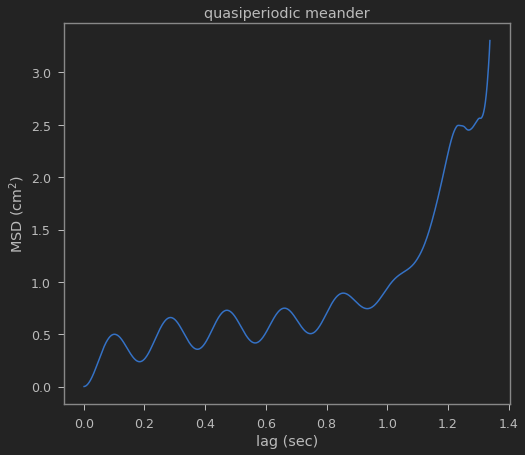

In [35]:
#TODO: measure D
x_values=df[df.src==src].lagt.values
y_values=df[df.src==src].msd.values
# plt.plot(x_values,np.sqrt(y_values)/DT,label='speed (cm/ms)')
plt.plot(x_values,y_values)

plt.xlabel('lag (sec)')
plt.ylabel(r'MSD (cm$^2$)')
plt.title('quasiperiodic meander')
# plt.legend()
plt.show()

In [48]:
MSD_thresh=1;
#choose tau_max
tau_min=x_values[np.argwhere(y_values-MSD_thresh>0)[0,0]]
tau_max=tau_min+0.5
last_tau=x_values[-1]
if tau_max>last_tau:
    tau_max=last_tau




In [53]:
#copy of method of computing slope with scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
#    std_err: D_stderr : Standard error of the estimated gradient.
#    slope  : D_expval : diffcoef of msd curve
D_expval=slope
D_stderr=std_err
D_expval

1.4291628874589464

In [52]:
D_stderr

0.02699978691946362

# TODO: compute MSD at the tail of the trajectory

In [87]:
trackpy.emsd?